In [1]:
import base64
import io
from PIL import Image
import numpy as np
import cv2
import numpy
import matplotlib.pyplot as plt
import requests,json
import random

In [2]:
with open("test/test.png", "rb") as image_file:
    base64str = base64.b64encode(image_file.read()).decode("utf-8")
print(base64str[:69]+"...")

iVBORw0KGgoAAAANSUhEUgAAAsMAAAPkCAYAAABMUjN4AAAAAXNSR0IArs4c6QAAAARnQ...


In [3]:
def base64str_to_PILImage(base64str):
    base64_img_bytes = base64str.encode('utf-8')
    base64bytes = base64.b64decode(base64_img_bytes)
    bytesObj = io.BytesIO(base64bytes)
    img = Image.open(bytesObj) 
    return img

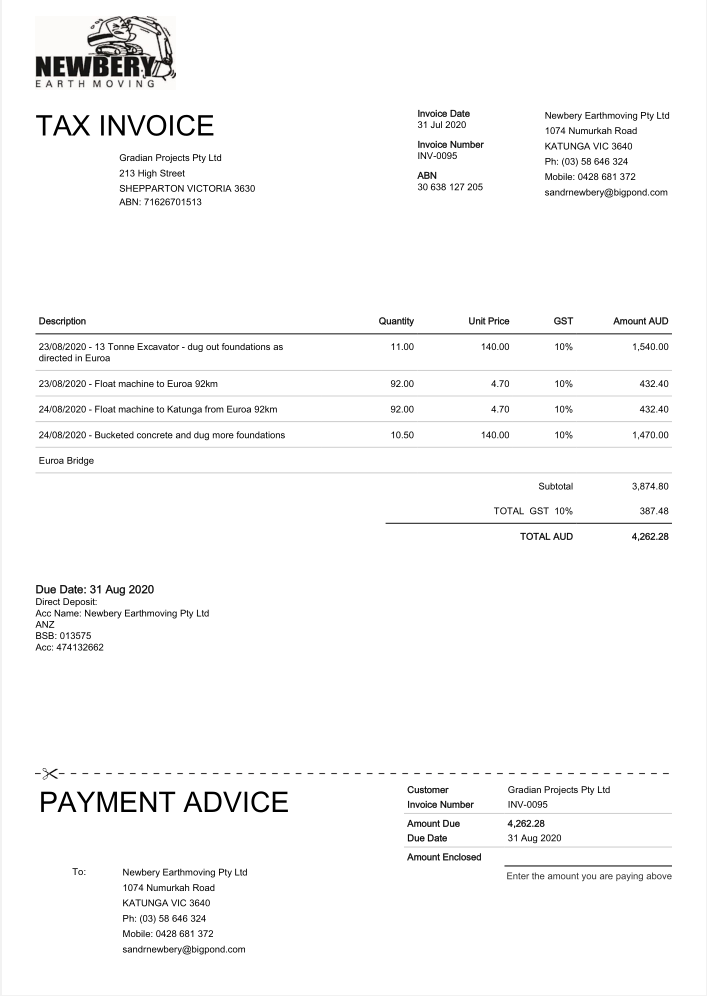

In [4]:
base64str_to_PILImage(base64str)

In [6]:
payload = json.dumps({
  "base64str": base64str,
  "threshold": 0.5
})

response = requests.put("http://54.206.124.186:8000/predict",data = payload)
data_dict = response.json()
data_dict

{'company(0.91)': ' ',
 'GST(0.9)': 'TOTAL GST 10% 387.48',
 'date(0.9)': '‘Due Date 34 Aug 2020',
 'date(0.89)': 'Due Date: 31 Aug 2020',
 'inv_number(0.88)': 'Invoice Number iNv-0095',
 'ABN(0.88)': 'ABN 30.638 127 205',
 'inv_date(0.86)': 'Invoice Date 31 Ju 2020',
 'total(0.86)': '“Amount Due 4,262.28',
 'total(0.85)': 'TOTAL AUD. 4,262.28',
 'inv_number(0.84)': 'Invoice Number = INV-0095.',
 'table(0.84)': '   Description Quantity Unit Price Sst Amount AUD 23)0872020 - 13 Tonne Excavator - dug eut foundations as 11.00 ‘40.00 10% 1540.00 Girected in Euroa  2730872020 - Fat machine ta Euroa 2k 92.00 470 10% 240 24/0872020- Float machine to Katunga from Euroa 82m 92.00 470 10% 48240 28/08/2020 -Bucketed concrete and dug more foundations 1050 +4000 10% 470.00  Euroa Bridge',
 'ABN(0.73)': 'ABN: 71626701513.'}

In [14]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('test') if isfile(join('test', f))]
onlyfiles

['00001121Statement01-05-2020-1_jpg.rf.c17501287d6f78cd65680afa8a2a07aa.jpg',
 '0931683_2-1_jpg.rf.54a276ded55eb13be996fbdac08b2354.jpg',
 '10160522-1_jpg.rf.047b88d03c27eaa01b844ac4a0b954d1.jpg',
 '10161104-1_jpg.rf.e01dba8159227f79bbfb75f60e2834fc.jpg',
 '10162436-1_jpg.rf.0c1db914fef94fd984ef2db8e174e600.jpg',
 '10166887-1_jpg.rf.2fa86886c71f28f22f83ca06786c7833.jpg',
 '113F3E5-1_jpg.rf.5e5a087f32675496a6f6acf4846b836b.jpg',
 '113F3E5-2_jpg.rf.7f14fe073364feaffff426b8182ca0cb.jpg',
 '113F3E5-5_jpg.rf.f4fa3d99f67d46aceea216db3991c7a7.jpg',
 '1150_001-1_jpg.rf.3db6a32e74a29781a909cca46ca7398d.jpg',
 '13-11-2020___Inv-_149941-2_jpg.rf.cc22f18b1eb34705012194611cde7474.jpg',
 '13062577-1_jpg.rf.6900ba53a0df37b8e524898f1dfd3d74.jpg',
 '1314554-Gradian-Projects-Pty-Ltd-1_jpg.rf.f63da10241d3a9509382b4a249ba71b1.jpg',
 '14037062-1_jpg.rf.5f6cc6745ac8729af54b0ff6fd3f728a.jpg',
 '14037699-1_jpg.rf.5e821a17a49eb10b42322ac39639fcd6.jpg',
 '1682FC1-1_jpg.rf.96c68823cb3b10c92aed0ff229d38ff9.jpg',


In [15]:
final = []
c= 0
for k in range(len(onlyfiles)):
    with open("test/" + str(onlyfiles[k]), "rb") as image_file:
        base64str = base64.b64encode(image_file.read()).decode("utf-8")
        payload = json.dumps({
          "base64str": base64str,
          "threshold": 0.5
        })

        response = requests.put("http://127.0.0.1:8000/predict",data = payload)
        data_dict = response.json()
        c+=1
        print(c)
        final.append(data_dict)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


In [16]:
final

[{'table(0.94)': '20/04/2020  20/04/2020  29/04/2020  30/04/2020  30/04/2020  216287  216303  216782  216884  216886  Invoice  Invoice  Invoice  Invoice  Invoice     $29.92 $329.10  Balance $329.10 $29.00 $319.00  Balance $319.00 $5.00 $55.00  Balance $55.00 $18.00 $198.00  Balance $198.00 $12.00 $132.00  Balance $132.00  rage 1 ot  30/05/2020  30/05/2020  30/05/2020  30/05/2020  30/05/2020',
  'company(0.9)': 'SHEPPARTON WORKWEAR',
  'GST(0.9)': 'GST $1,033.10',
  'date(0.89)': 'Due 30/05/2020',
  'total(0.89)': 'Outstanding total $1,033.10',
  'inv_date(0.89)': 'Friday, 1 May 2020',
  'total(0.88)': 'Balance $1,033.1(',
  'GST(0.86)': 'rax Amount $93.92',
  'acc_details(0.85)': 'National Bank of Australia - Shepparton; BSB: 083 894; Acc Nc 51934-6809 Acc Name: Shepparton Workware & Safety',
  'ABN(0.84)': 'A.B.N.: 58-193-153-210'},
 {'acc_details(0.92)': 'For payment direct to bank account: NATIONAL BANK  BSB 083-894  ACCOUNT 580189697',
  'table(0.92)': '| Order No: John Harvey     